In [1]:
%pylab inline
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

In [76]:
#pip install -U imbalanced-learn

     |████████████████████████████████| 206 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 2.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: 

In [46]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#columns to drop
inv_cols = [col for col in data.columns if 'inv' in col]
hardship_cols = [col for col in data.columns if 'hardship' in col]
settlement_cols = [col for col in data.columns if 'settlement' in col]

In [57]:
data = data[data.columns.drop(list(data.filter(inv_cols)))]
data = data[data.columns.drop(list(data.filter(hardship_cols)))]
data = data[data.columns.drop(list(data.filter(settlement_cols)))]

In [102]:
inv_cols

['funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv']

In [58]:
data.shape

(2260701, 129)

In [59]:
#more columns to drop
data = data.drop(['desc','title','url','member_id','deferral_term','payment_plan_start_date','orig_projected_additional_accrued_interest','disbursement_method'],\
                 axis=1)

In [60]:
data.shape

(2260701, 121)

In [5]:
data.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_last_payment_amount
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 121 entries, id to sec_app_mths_since_last_major_derog
dtypes: float64(99), object(22)
memory usage: 2.0+ GB


In [62]:
#rows to drop
rows_to_drop_id = list(data[data['id'].str.contains('Total|Loans', na=False)].index)
print('We will be dropping', len(rows_to_drop_id), 'rows')

data = data.drop(rows_to_drop_id)
data

We will be dropping 33 rows


,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,68407277,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,24000.0,24000.0,60 months,12.79,543.50,C,C1,Unit Operator,7 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260695,88977788,24000.0,24000.0,60 months,10.49,515.74,B,B3,Database Administrator,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260696,88985880,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [63]:
#rows to keep = Fully Paid or Charged Off
rows_to_keep_id = list(data[data['loan_status'].str.contains('Fully|Charged', na=False)].index)

data = data.loc[rows_to_keep_id]
data.shape

(1348059, 121)

In [64]:
data.loan_status.value_counts()

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Name: loan_status, dtype: int64

In [69]:
data['term'] = list(map(lambda x: int(x.split(' ')[1]),data.term))

In [72]:
# new column for target classifier
data['target'] = [1 if 'Fully Paid' in x else 0 for x in data['loan_status']]

In [73]:
data.target.value_counts()

1    1078739
0     269320
Name: target, dtype: int64

In [74]:
# EXPORT data to a new csv file
# data.to_csv('partial_clean_data.csv',index=False)

## secondary starting point

In [91]:
data = pd.read_csv('partial_clean_data.csv')

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
lencoder = LabelEncoder()

In [77]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'target'],
      dtype='object', length=122)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348059 entries, 0 to 1348058
Columns: 119 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(99), int64(1), object(19)
memory usage: 1.2+ GB


In [ ]:
## more columns to remove
# issue_d, last_pymnt_d, last_pymnt_amnt, out_prncp, policy_code, zip_code, total_pymnt, total_rec_int, total_rec_late_fee, total_rec_prncp, recoveries

In [93]:
data = data.drop(['issue_d', 'last_pymnt_d', 'last_pymnt_amnt', 'out_prncp', 'policy_code', 'zip_code', 'total_pymnt', 'total_rec_int','total_rec_late_fee',\
                  'total_rec_prncp', 'recoveries'],1)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348059 entries, 0 to 1348058
Columns: 108 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(91), int64(1), object(16)
memory usage: 1.1+ GB


In [115]:
data['purpose'].value_counts()

debt_consolidation    781421
credit_card           295619
home_improvement       87718
other                  78299
major_purchase         29548
medical                15612
small_business         15577
car                    14649
moving                  9526
vacation                9084
house                   7297
wedding                 2350
renewable_energy         936
educational              423
Name: purpose, dtype: int64

In [111]:
## FICO related columns
FICO_cols = ['earliest_cr_line', 'acc_now_delinq', 'acc_open_past24mths', 'all_util', 'avg_cur_bal', 'inq_fi', 'inq_last_6mths', 'inq_last_12m']

In [112]:
df = data[data.columns.drop(list(data.filter(FICO_cols)))]

### subset of data

In [95]:
y = data.target

In [97]:
df = data[['term','int_rate','grade','sub_grade','purpose','application_type','emp_length','verification_status',\
           'home_ownership','initial_list_status','installment','funded_amnt','loan_amnt','fico_range_high','fico_range_low',\
          'all_util','tot_cur_bal']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348059 entries, 0 to 1348058
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   term                 1348059 non-null  int64  
 1   int_rate             1348059 non-null  float64
 2   grade                1348059 non-null  object 
 3   sub_grade            1348059 non-null  object 
 4   purpose              1348059 non-null  object 
 5   application_type     1348059 non-null  object 
 6   emp_length           1269514 non-null  object 
 7   verification_status  1348059 non-null  object 
 8   home_ownership       1348059 non-null  object 
 9   initial_list_status  1348059 non-null  object 
 10  installment          1348059 non-null  float64
 11  funded_amnt          1348059 non-null  float64
 12  loan_amnt            1348059 non-null  float64
 13  fico_range_high      1348059 non-null  float64
 14  fico_range_low       1348059 non-null  float64
 15

In [87]:
df.emp_length.value_counts()

10     442669
2      122092
0      108533
3      107863
1       88842
5       84326
4       80761
-1      78545
6       62877
8       60808
7       59724
9       51019
Name: emp_length, dtype: int64

In [88]:
df.emp_length

0          10 
1          10 
2          10 
3           3 
4           4 
          ... 
1348054     5 
1348055     9 
1348056     3 
1348057    10 
1348058     6 
Name: emp_length, Length: 1348059, dtype: object

In [ ]:
## Ordinal objects (use label-encoding)
# emp_length
# application_type
# grade
# sub_grade
# verification_status
# home_ownership
# initial_list_status

In [99]:
#df['emp_length'] = df['emp_length'].replace({"< 1 year": "0", "10+ years": "10"}, inplace=True)
df['emp_length'] = df['emp_length'].astype(str)
#df['emp_length'] = list(map(lambda x: x.split(' ')[0],df.emp_length))
df['emp_length'] = df['emp_length'].apply(lambda x: x.replace("years","").replace("year","").replace("+","").replace("< 1","0").replace("nan","-1")).astype(int)

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [101]:
#df['emp_length']= lencoder.fit_transform(df['emp_length']) 
df['application_type'] = lencoder.fit_transform(df['application_type']) 
#df.loc[df['application_type'].notnull(),'application_type'] = lencoder.fit_transform(df['application_type']) 
#df['grade'] = lencoder.fit_transform(df['grade'])
df['sub_grade'] = lencoder.fit_transform(df['sub_grade'])
df['verification_status'] = lencoder.fit_transform(df['verification_status'])
df['home_ownership'] = lencoder.fit_transform(df['home_ownership'])
df['initial_list_status'] = lencoder.fit_transform(df['initial_list_status'])

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [86]:
df.emp_length.value_counts()

10     442669
2      122092
0      108533
3      107863
1       88842
5       84326
4       80761
-1      78545
6       62877
8       60808
7       59724
9       51019
Name: emp_length, dtype: int64

In [103]:
df['grade'] = df['grade'].astype(str)
df['grade'] = df['grade'].apply(lambda x: x.replace("A",'1').replace("B",'2').replace("C","3").replace("D","4").replace("E","5").replace("F","6").replace("G","7"))
df['grade'] = df['grade'].astype(int)

/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/viviannchan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [104]:
df.application_type.value_counts()

0    1322259
1      25800
Name: application_type, dtype: int64

In [15]:
#df[df['all_util'].isna()]
df[df['tot_cur_bal'].isna()]
df[df['tot_cur_bal']==0]

,term,int_rate,grade,sub_grade,purpose,application_type,emp_length,verification_status,home_ownership,initial_list_status,installment,funded_amnt,loan_amnt,fico_range_high,fico_range_low,all_util,tot_cur_bal
4254,36,11.99,C,C1,other,Individual,3 years,Verified,RENT,w,132.84,4000.0,4000.0,709.0,705.0,0.0,0.0
26081,36,7.89,A,A5,home_improvement,Individual,10+ years,Not Verified,MORTGAGE,w,625.72,20000.0,20000.0,784.0,780.0,NaN,0.0
29021,36,9.17,B,B2,other,Individual,4 years,Source Verified,RENT,w,57.39,1800.0,1800.0,679.0,675.0,NaN,0.0
34743,36,10.64,B,B4,debt_consolidation,Individual,10+ years,Verified,MORTGAGE,w,319.18,9800.0,9800.0,689.0,685.0,NaN,0.0
43275,36,16.99,D,D3,other,Individual,NaN,Verified,OWN,f,85.56,2400.0,2400.0,789.0,785.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305361,36,23.99,E,E2,moving,Individual,2 years,Verified,RENT,f,1162.12,29625.0,29625.0,714.0,710.0,0.0,0.0
1319683,36,6.99,A,A2,home_improvement,Individual,7 years,Source Verified,RENT,f,92.62,3000.0,3000.0,689.0,685.0,0.0,0.0
1325120,36,16.99,D,D1,major_purchase,Individual,2 years,Source Verified,RENT,f,178.24,5000.0,5000.0,664.0,660.0,0.0,0.0
1327026,36,17.99,D,D2,home_improvement,Individual,2 years,Source Verified,RENT,f,361.48,10000.0,10000.0,719.0,715.0,0.0,0.0


In [ ]:
## Non-ordinal objects (use one-hot encoding/ get_dummies)
# purpose

In [152]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder()
# purpose = onehotencoder.fit_transform(df.purpose.values.reshape(-1,1)).toarray()
# df.purpose

In [105]:
purpose_dummies = pd.get_dummies(df.purpose)
df = pd.concat([df, purpose_dummies], axis=1)
df = df.drop('purpose',1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348059 entries, 0 to 1348058
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   term                 1348059 non-null  int64  
 1   int_rate             1348059 non-null  float64
 2   grade                1348059 non-null  int64  
 3   sub_grade            1348059 non-null  int64  
 4   application_type     1348059 non-null  int64  
 5   emp_length           1348059 non-null  int64  
 6   verification_status  1348059 non-null  int64  
 7   home_ownership       1348059 non-null  int64  
 8   initial_list_status  1348059 non-null  int64  
 9   installment          1348059 non-null  float64
 10  funded_amnt          1348059 non-null  float64
 11  loan_amnt            1348059 non-null  float64
 12  fico_range_high      1348059 non-null  float64
 13  fico_range_low       1348059 non-null  float64
 14  all_util             537545 non-null   float64
 15

In [68]:
#downsample first
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df, y)

In [69]:
X_resampled.shape

(538640, 30)

In [71]:
#create train-test split on undersampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0, stratify=y_resampled)

In [72]:
X_train.shape

(377048, 30)

In [73]:
X_test.shape

(161592, 30)

In [74]:
df.describe()

,term,int_rate,grade,sub_grade,application_type,verification_status,home_ownership,initial_list_status,installment,funded_amnt,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
count,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,...,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06,1.348059e+06
mean,4.178392e+01,1.324148e+01,2.748352e+00,1.070588e+01,1.913863e-02,1.008479e+00,2.912323e+00,5.815843e-01,4.377778e+02,1.440019e+04,...,6.506985e-02,5.412968e-03,2.191892e-02,1.158110e-02,7.066456e-03,5.808277e-02,6.943316e-04,1.155513e-02,6.738577e-03,1.743247e-03
std,1.026453e+01,4.765619e+00,1.296746e+00,6.458499e+00,1.370122e-01,7.829619e-01,1.915722e+00,4.932993e-01,2.614953e+02,8.712202e+03,...,2.466492e-01,7.337351e-02,1.464189e-01,1.069906e-01,8.376471e-02,2.339000e-01,2.634103e-02,1.068720e-01,8.181182e-02,4.171582e-02
min,3.600000e+01,5.310000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.930000e+00,5.000000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+01,9.750000e+00,2.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.482850e+02,7.950000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.600000e+01,1.274000e+01,3.000000e+00,1.000000e+01,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,3.750400e+02,1.200000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.600000e+01,1.599000e+01,4.000000e+00,1.500000e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,5.802200e+02,2.000000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.000000e+01,3.099000e+01,7.000000e+00,3.400000e+01,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,1.719830e+03,4.000000e+04,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377048 entries, 498615 to 231164
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 377048 non-null  int64  
 1   int_rate             377048 non-null  float64
 2   grade                377048 non-null  int64  
 3   sub_grade            377048 non-null  int64  
 4   application_type     377048 non-null  int64  
 5   emp_length           377048 non-null  object 
 6   verification_status  377048 non-null  int64  
 7   home_ownership       377048 non-null  int64  
 8   initial_list_status  377048 non-null  int64  
 9   installment          377048 non-null  float64
 10  funded_amnt          377048 non-null  float64
 11  loan_amnt            377048 non-null  float64
 12  fico_range_high      377048 non-null  float64
 13  fico_range_low       377048 non-null  float64
 14  all_util             157383 non-null  float64
 15  tot_cur_bal 

In [76]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [181]:
randomForest.feature_importances_

array([1.70149971e-02, 1.43800041e-01, 3.39806430e-02, 8.18035296e-02,
       4.70770632e-03, 1.12478527e-01, 3.91954582e-02, 2.40751239e-02,
       1.99047792e-02, 1.78899415e-01, 1.38061789e-01, 7.09541944e-02,
       7.13873798e-02, 2.58494670e-03, 1.26073762e-02, 1.59398924e-02,
       1.22699390e-04, 7.76653247e-03, 1.72087572e-03, 4.45139714e-03,
       3.10598300e-03, 2.11920337e-03, 7.54834708e-03, 3.33629653e-04,
       3.02947033e-03, 1.86103610e-03, 5.45027654e-04])

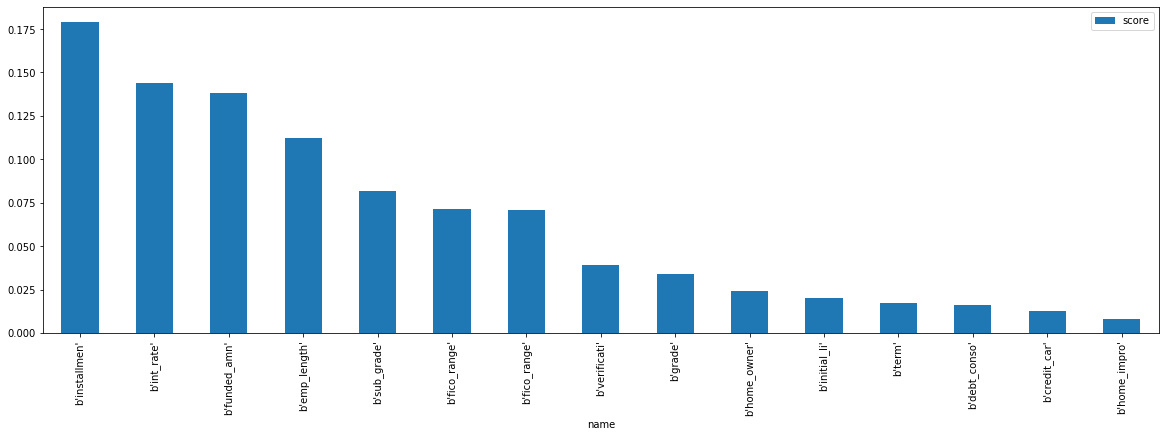

In [184]:
feature_importance = list(zip(X_train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score',figsize=(20,6))

In [ ]:
#downsample method #2
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled_cc, y_resampled_cc = cc.fit_resample(df, y)